# Task11 - California Housing dataset preprocessing

###   
### 1. Importing the important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model

###    
### 2. Loading the dataset

In [2]:
housing = pd.read_csv("/home/noura/Documents/housing.csv")
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0          880           129.0   
1    -122.22     37.86                21.0         7099          1106.0   
2    -122.24     37.85                52.0         1467           190.0   
3    -122.25     37.85                52.0         1274           235.0   
4    -122.25     37.85                 NaN         1627           280.0   

   population households  median_income  median_house_value ocean_proximity  \
0       322.0        126         8.3252              452600        NEAR BAY   
1      2401.0       1138         8.3014              358500        NEAR BAY   
2       496.0        177         7.2574              352100        NEAR BAY   
3       558.0        219         5.6431              341300        NEAR BAY   
4         NaN        259         3.8462              342200        NEAR BAY   

   gender  
0    male  
1  female  
2    male  
3  female  
4    male

###   
### 3. Getting some information about the structure of the dataset

In [3]:
#info about the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20382 non-null  float64
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      15758 non-null  float64
 5   population          20596 non-null  float64
 6   households          19335 non-null  object 
 7   median_income       17873 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
 10  gender              16620 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 1.7+ MB


- The dataset has 11 columns and 20640 rows

In [4]:
#the shape of the dataset
housing.shape

(20640, 11)

###    
### 4. Handling missing values

In [5]:
#checking for the missing valeus
housing.isnull()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0          False     False               False        False           False   
1          False     False               False        False           False   
2          False     False               False        False           False   
3          False     False               False        False           False   
4          False     False                True        False           False   
...          ...       ...                 ...          ...             ...   
20635      False     False               False        False           False   
20636      False     False               False        False           False   
20637      False     False               False        False           False   
20638      False     False               False        False           False   
20639      False     False               False        False           False   

       population  households  median_income  median_house_value  \
0           False       False          False               False   
1           False       False          False               False   
2           False       False          False               False   
3           False       False          False               False   
4            True       False          False               False   
...           ...         ...            ...                 ...   
20635       False       False          False               False   
20636       False       False          False               False   
20637       False       False          False               False   
20638       False       False          False               False   
20639       False       False          False               False   

       ocean_proximity  gender  
0                False   False  
1                False   False  
2                False   False  
3                False   False  
4                False   False  
...                ...     ...  
20635            False   False  
20636            False   False  
20637            False   False  
20638            False   False  
20639            False   False  

[20640 rows x 11 columns]

In [6]:
#getting the number of the missing values
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age     258
total_rooms              0
total_bedrooms        4882
population              44
households            1305
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

<AxesSubplot:>

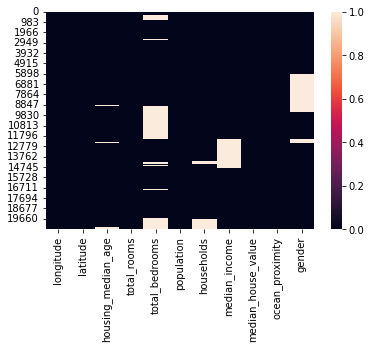

In [7]:
#Visualizing the missing values
sns.heatmap(housing.isnull(), cmap = "rocket")

In [8]:
#dropping the records that has more than three empty entries
housing.dropna(thresh = 8, inplace = True)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                41.0          880           129.0   
1        -122.22     37.86                21.0         7099          1106.0   
2        -122.24     37.85                52.0         1467           190.0   
3        -122.25     37.85                52.0         1274           235.0   
4        -122.25     37.85                 NaN         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                25.0         1665           374.0   
20636    -121.21     39.49                18.0          697           150.0   
20637    -121.22     39.43                17.0         2254           485.0   
20638    -121.32     39.43                18.0         1860           409.0   
20639    -121.24     39.37                16.0         2785           616.0   

       population households  median_income  median_house_value  \
0           322.0        126         8.3252              452600   
1          2401.0       1138         8.3014              358500   
2           496.0        177         7.2574              352100   
3           558.0        219         5.6431              341300   
4             NaN        259         3.8462              342200   
...           ...        ...            ...                 ...   
20635       845.0        330         1.5603               78100   
20636       356.0        114         2.5568               77100   
20637      1007.0        433         1.7000               92300   
20638       741.0        349         1.8672               84700   
20639      1387.0        530         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

In [9]:
#recheck the missing values after dropping some records
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age     257
total_rooms              0
total_bedrooms        4881
population              43
households            1304
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###   
#### 4.1 Missing values in the housing_median_age column

In [10]:
housing["housing_median_age"].isnull().sum()

257

In [11]:
#The type of the data stored in the housing_median_age
housing["housing_median_age"]

0        41.0
1        21.0
2        52.0
3        52.0
4         NaN
         ... 
20635    25.0
20636    18.0
20637    17.0
20638    18.0
20639    16.0
Name: housing_median_age, Length: 20639, dtype: float64

- The data in the housing_median_age is continuous, so the NaNs can be replaced using the expected values or what we call the mean.

In [12]:
#statistical information about the column
housing["housing_median_age"].describe()

count    20382.000000
mean        28.676283
std         12.589284
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

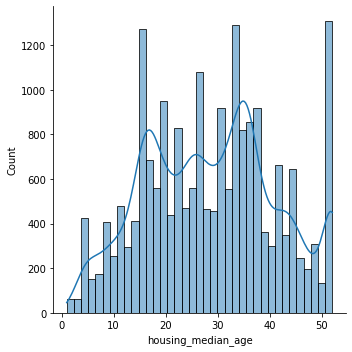

In [13]:
#checking the distribution of the data before any updates
sns.displot(housing, x="housing_median_age", kde=True, palette='rocket')

In [14]:
#getting the mean of the housing_median_age column
housing_median_age_mean = housing["housing_median_age"].mean()
#filling the missing values in the housing_median_age column with the mean
housing["housing_median_age"].fillna(housing_median_age_mean, inplace = True)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

       population households  median_income  median_house_value  \
0           322.0        126         8.3252              452600   
1          2401.0       1138         8.3014              358500   
2           496.0        177         7.2574              352100   
3           558.0        219         5.6431              341300   
4             NaN        259         3.8462              342200   
...           ...        ...            ...                 ...   
20635       845.0        330         1.5603               78100   
20636       356.0        114         2.5568               77100   
20637      1007.0        433         1.7000               92300   
20638       741.0        349         1.8672               84700   
20639      1387.0        530         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

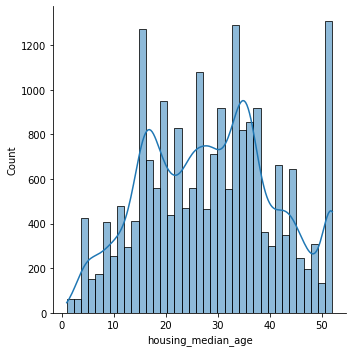

In [15]:
#checking the distribution of the data after filling the missing values
sns.displot(housing, x="housing_median_age", kde=True, palette='rocket')

- We can notice from the previous graph the distribution hasn't changed, so filling the missing value with the mean was the best choice.
###     

<AxesSubplot:>

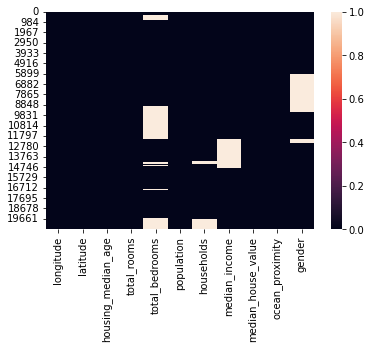

In [16]:
#revisualizing the missing values
sns.heatmap(housing.isnull(), cmap = "rocket")

In [17]:
#recheck the missing values 
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms        4881
population              43
households            1304
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###   
#### 4.2 Missing values in the total_bedrooms column

In [18]:
housing["total_bedrooms"].isnull().sum()

4881

In [19]:
#The type of the data stored in the total_bedrooms
housing["total_bedrooms"]

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20639, dtype: float64

- The data in the column is continous, so it can be filled using the mean, median or mode.

In [20]:
#statistical information about the column
housing["total_bedrooms"].describe()

count    15758.000000
mean       539.920104
std        419.834171
min          1.000000
25%        296.000000
50%        435.000000
75%        652.000000
max       6210.000000
Name: total_bedrooms, dtype: float64

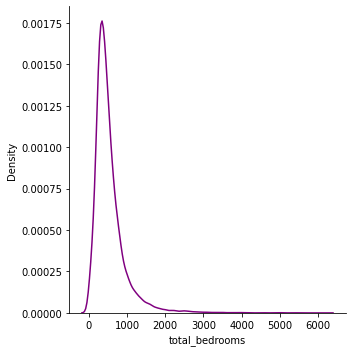

In [21]:
#checking the distribution of the data before any updates
sns.displot(housing, x="total_bedrooms", kind = "kde", color = 'Purple' )

In [22]:
#getting the mean of the total_bedrooms column
total_bedrooms_mean = housing["total_bedrooms"].mean()
#filling the missing values in the total_bedrooms column with the mean
housing1=housing["total_bedrooms"].fillna(total_bedrooms_mean)
housing1

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20639, dtype: float64

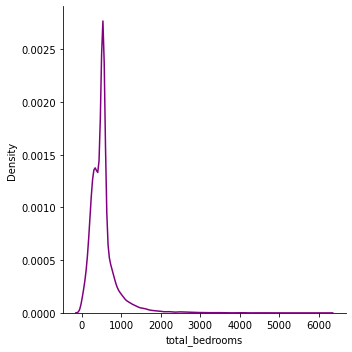

In [23]:
#checking the distribution of the data after filling the missing values
sns.displot(housing1, kind = "kde", color = 'Purple' )

In [24]:
#getting the median of the total_bedrooms column
total_bedrooms_median = housing["total_bedrooms"].median()
#filling the missing values in the total_bedrooms column with the median
housing2=housing["total_bedrooms"].fillna(total_bedrooms_median)
housing2

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20639, dtype: float64

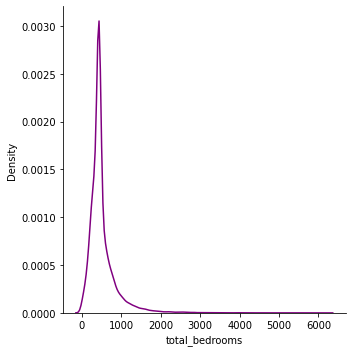

In [25]:
#checking the distribution of the data after filling the missing values
sns.displot(housing2, kind = "kde", color = 'Purple' )

In [26]:
#getting the mode of the total_bedrooms column
total_bedrooms_mode = housing["total_bedrooms"].mode()[0]
#filling the missing values in the total_bedrooms column with the mode
housing3=housing["total_bedrooms"].fillna(total_bedrooms_mode)
housing3

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20639, dtype: float64

In [27]:
housing3.isnull().sum()

0

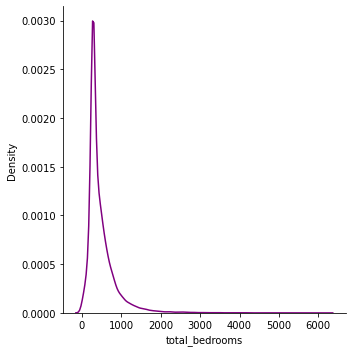

In [28]:
#checking the distribution of the data after filling the missing values
sns.displot(housing3, kind = "kde", color = 'Purple' )

In [29]:
#filling randomly
fill_list = housing["total_bedrooms"].dropna()
housing4 = housing["total_bedrooms"].fillna(pd.Series(np.random.choice(fill_list, size = len(housing.index))))
housing4

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
20635     374.0
20636     150.0
20637     485.0
20638     409.0
20639     616.0
Name: total_bedrooms, Length: 20639, dtype: float64

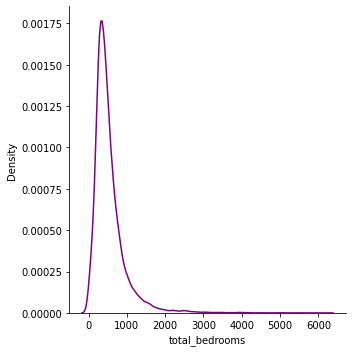

In [30]:
#checking the distribution of the data after filling the missing values
sns.displot(housing4, kind = "kde", color = 'Purple' )

In [31]:
#filling the missing values in the total_bedrooms column randomly
housing["total_bedrooms"] = housing4
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

       population households  median_income  median_house_value  \
0           322.0        126         8.3252              452600   
1          2401.0       1138         8.3014              358500   
2           496.0        177         7.2574              352100   
3           558.0        219         5.6431              341300   
4             NaN        259         3.8462              342200   
...           ...        ...            ...                 ...   
20635       845.0        330         1.5603               78100   
20636       356.0        114         2.5568               77100   
20637      1007.0        433         1.7000               92300   
20638       741.0        349         1.8672               84700   
20639      1387.0        530         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

In [32]:
#recheck the missing values 
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population              43
households            1304
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###   
#### 4.3 Missing values in the population column

In [33]:
housing["population"].isnull().sum()

43

In [34]:
#The type of the data stored in the population column
housing["population"]

0         322.0
1        2401.0
2         496.0
3         558.0
4           NaN
          ...  
20635     845.0
20636     356.0
20637    1007.0
20638     741.0
20639    1387.0
Name: population, Length: 20639, dtype: float64

- The data in the column is continous, so it can be filled using the mean, median or mode.

In [35]:
#Some statistical information about the column
housing["population"].describe()

count    20596.000000
mean      1424.928724
std       1132.237768
min          3.000000
25%        787.000000
50%       1166.000000
75%       1725.000000
max      35682.000000
Name: population, dtype: float64

<AxesSubplot:xlabel='population'>

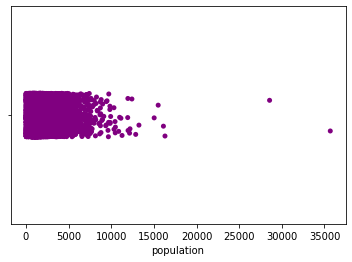

In [36]:
#checking the distribution of the data before any updates
sns.stripplot( x=housing["population"], color = 'Purple' )

In [37]:
#getting the mean of the population column
population_mean = housing["population"].mean()
#filling the missing values in the population column with the mean
housing1=housing["population"].fillna(population_mean)
housing1

0         322.000000
1        2401.000000
2         496.000000
3         558.000000
4        1424.928724
            ...     
20635     845.000000
20636     356.000000
20637    1007.000000
20638     741.000000
20639    1387.000000
Name: population, Length: 20639, dtype: float64

<AxesSubplot:xlabel='population'>

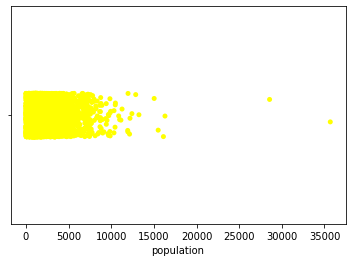

In [38]:
#checking the distribution of the data after filling the missing values
sns.stripplot( x=housing["population"], color = 'Yellow' )

- The distribution hasn't changed, so we can use the mean to fill the missing values in this column.

In [39]:
#filling the missing values in the population column with the mean
housing["population"].fillna(population_mean, inplace = True)
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population households  median_income  median_house_value  \
0       322.000000        126         8.3252              452600   
1      2401.000000       1138         8.3014              358500   
2       496.000000        177         7.2574              352100   
3       558.000000        219         5.6431              341300   
4      1424.928724        259         3.8462              342200   
...            ...        ...            ...                 ...   
20635   845.000000        330         1.5603               78100   
20636   356.000000        114         2.5568               77100   
20637  1007.000000        433         1.7000               92300   
20638   741.000000        349         1.8672               84700   
20639  1387.000000        530         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

In [40]:
#recheck the missing values
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households            1304
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###   
#### 4.4 Missing values in the households column

In [41]:
housing["households"].isnull().sum()

1304

In [42]:
#The type of the data stored in the households column
housing["households"]

0         126
1        1138
2         177
3         219
4         259
         ... 
20635     330
20636     114
20637     433
20638     349
20639     530
Name: households, Length: 20639, dtype: object

In [43]:
housing["households"].value_counts()

no      3080
282       47
375       46
380       45
306       45
        ... 
1649       1
1879       1
1050       1
1119       1
1843       1
Name: households, Length: 1703, dtype: int64

In [44]:
#Some statistical information about the column
housing["households"].describe()

count     19335
unique     1703
top          no
freq       3080
Name: households, dtype: object

In [45]:
housing1 = housing["households"].copy()
housing1.replace("no", 0, inplace = True)
housing1=housing1.astype(float)
housing1

0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 20639, dtype: float64

In [46]:
sns.displot(x=housing1)

In [47]:
#getting the mode of the thouseholds column
households_mode = housing1.mode()[0]
#filling the missing values in the households column with the mode
housing2 = housing1.fillna(households_mode)

In [48]:
sns.displot(x=housing2)

- The distribution changed.

In [49]:
#filling randomly
fill_list = housing1.dropna()
housing3 = housing1.fillna(pd.Series(np.random.choice(fill_list, size = len(housing.index))))
housing3

0         126.0
1        1138.0
2         177.0
3         219.0
4         259.0
          ...  
20635     330.0
20636     114.0
20637     433.0
20638     349.0
20639     530.0
Name: households, Length: 20639, dtype: float64

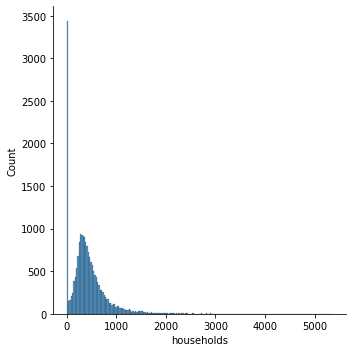

In [50]:
sns.displot(x=housing3)

- Filling randomly hasn't changed the distribution, so we will fill with it.

In [51]:
#filling with the mode
housing['households'] = housing3
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
1      2401.000000      1138.0         8.3014              358500   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

In [52]:
#recheck the missing values 
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income         2767
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###   
#### 4.5 Missing values in the median_income column

In [53]:
housing["median_income"].isnull().sum()

2767

In [54]:
#The type of the data stored in the median_income column
housing["median_income"]

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

- The data is continious.

In [55]:
#some statistical information about the column
housing["median_income"].describe()

count    17872.000000
mean         3.939449
std          1.943562
min          0.499900
25%          2.598575
50%          3.587300
75%          4.830575
max         15.000100
Name: median_income, dtype: float64

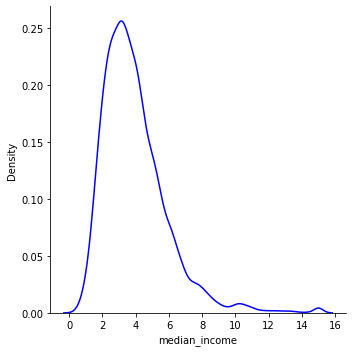

In [56]:
#checking the distribution of the data before any updates
sns.displot(housing,x='median_income' ,kind = "kde", color = 'Blue' )

In [57]:
#getting the mean of the median_income column
median_income_mean = housing["median_income"].mean()
#filling the missing values in the total_bedrooms column with the mean
housing1=housing["median_income"].fillna(median_income_mean)
housing1

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

In [58]:
#checking the distribution of the data after filling the missing values
sns.displot(x=housing1 ,kind = "kde", color = '#CEB180' )

- The distribution changed, so the mean isn't the best choice here.

In [59]:
#getting the median of the median_income column
median_income_median = housing["median_income"].median()
#filling the missing values in the total_bedrooms column with the median
housing2=housing["median_income"].fillna(median_income_median)
housing2

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

In [60]:
#checking the distribution of the data after filling the missing values
sns.displot(housing2, kind = "kde", color = '#CEB180' )

- The median isn't the best choice here too.

In [61]:
#getting the median of the median_income column
median_income_mode = housing["median_income"].mode()[0]
#filling the missing values in the total_bedrooms column with the mode
housing3=housing["median_income"].fillna(median_income_mode)
housing3

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

In [62]:
#checking the distribution of the data after filling the missing values
sns.displot(housing3, kind = "kde", color = '#CEB180' )

- This could be the worst choice ever!

In [63]:
#fill forward method
housing4 = housing["median_income"].fillna(method = "ffill")
housing4

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

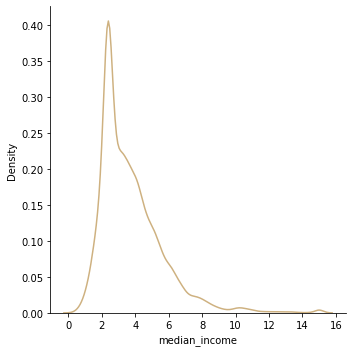

In [64]:
#checking the distribution of the data after filling the missing values
sns.displot(housing4, kind = "kde", color = '#CEB180' )

In [65]:
#fill backward method
housing5 = housing["median_income"].fillna(method = "bfill")
housing5

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

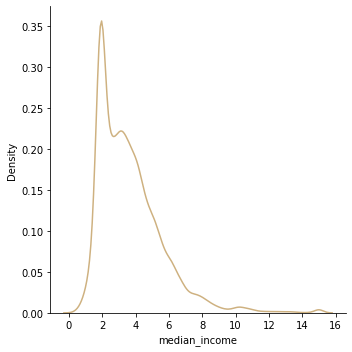

In [66]:
#checking the distribution of the data after filling the missing values
sns.displot(housing5, kind = "kde", color = '#CEB180' )

In [67]:
#filling randomly
fill_list = housing["median_income"].dropna()
housing6 = housing["median_income"].fillna(pd.Series(np.random.choice(fill_list, size = len(housing.index))))
housing6

0        8.3252
1        8.3014
2        7.2574
3        5.6431
4        3.8462
          ...  
20635    1.5603
20636    2.5568
20637    1.7000
20638    1.8672
20639    2.3886
Name: median_income, Length: 20639, dtype: float64

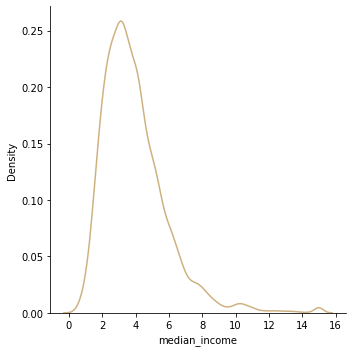

In [68]:
#checking the distribution of the data after filling the missing values
sns.displot(housing6, kind = "kde", color = '#CEB180' )

- Filling randomly method has the best distribution.

In [69]:
#filling with the mode
housing['median_income'] = housing6
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
1      2401.000000      1138.0         8.3014              358500   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

In [70]:
#recheck the missing values 
housing.isnull().sum()

longitude                0
latitude                 0
housing_median_age       0
total_rooms              0
total_bedrooms           0
population               0
households               0
median_income            0
median_house_value       0
ocean_proximity          0
gender                4020
dtype: int64

###  
#### 4.6 The missing values of the gender column

In [71]:
housing["gender"].isnull().sum()

4020

In [72]:
#info about the column
housing["gender"].value_counts()

female    8672
male      7947
Name: gender, dtype: int64

In [73]:
#some statistical information about the column
housing["gender"].describe()

count      16619
unique         2
top       female
freq        8672
Name: gender, dtype: object

In [74]:
#checking the distribution of the data before any updates
sns.countplot(x="gender", data = housing, palette='viridis')

<AxesSubplot:xlabel='gender', ylabel='count'>

In [75]:
#getting the mode of the thouseholds column
gender_mode = housing["gender"].mode()[0]
#filling the missing values in the households column with the mode
housing1 = housing["gender"].fillna(gender_mode)
housing1

0          male
1        female
2          male
3        female
4          male
          ...  
20635    female
20636      male
20637    female
20638      male
20639    female
Name: gender, Length: 20639, dtype: object

/home/noura/snap/jupyter/common/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='gender', ylabel='count'>

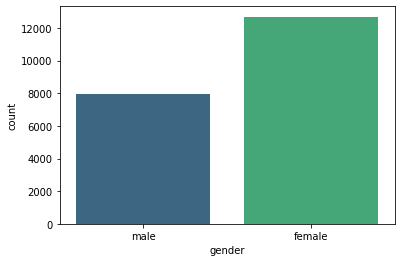

In [76]:
#checking the distribution of the data after filling the missing values
sns.countplot(housing1, palette='viridis')

- The distribution changed completely

In [77]:
#filling randomly
fill_list = ["female","male"]
housing["gender"] = housing["gender"].fillna(pd.Series(np.random.choice(fill_list, size = len(housing.index))))
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
1      2401.000000      1138.0         8.3014              358500   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

      ocean_proximity  gender  
0            NEAR BAY    male  
1            NEAR BAY  female  
2            NEAR BAY    male  
3            NEAR BAY  female  
4            NEAR BAY    male  
...               ...     ...  
20635          INLAND  female  
20636          INLAND    male  
20637          INLAND  female  
20638          INLAND    male  
20639          INLAND  female  

[20639 rows x 11 columns]

<AxesSubplot:xlabel='gender', ylabel='count'>

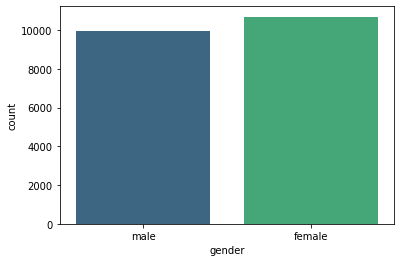

In [78]:
#checking the distribution of the data after filling the missing values
sns.countplot(x="gender", data = housing, palette='viridis')

- This is the best choice to fill the missing values in the gender column.

In [79]:
#recheck the missing values
housing.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
gender                0
dtype: int64

- Finally, there is no missing values.

###  
### 5. Encoding

In [80]:
ocean_proximity_encoder = LabelEncoder()
gender_encoder = LabelEncoder()

In [81]:
#encoding ocean_proximity
housing["ocean_proximity"] = ocean_proximity_encoder.fit_transform(housing["ocean_proximity"])
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
1      2401.000000      1138.0         8.3014              358500   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3    male  
1                    3  female  
2                    3    male  
3                    3  female  
4                    3    male  
...                ...     ...  
20635                1  female  
20636                1    male  
20637                1  female  
20638                1    male  
20639                1  female  

[20639 rows x 11 columns]

In [82]:
#encoding gender
housing["gender"] = gender_encoder.fit_transform(housing["gender"])
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
1        -122.22     37.86           21.000000         7099          1106.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
1      2401.000000      1138.0         8.3014              358500   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3       1  
1                    3       0  
2                    3       1  
3                    3       0  
4                    3       1  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[20639 rows x 11 columns]

###    
### 6. Handling the outliers

####  
#### 6.1 housing_median_age column

In [83]:
#Detecting the outliers using box and scatter plots
sns.set(rc = {'figure.figsize':(80,20)})
sns.boxplot(x="housing_median_age", y = "median_house_value", data = housing)

<AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>

- There is no outliers in the housing_median_age column

####  
#### 6.2 total_rooms column

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

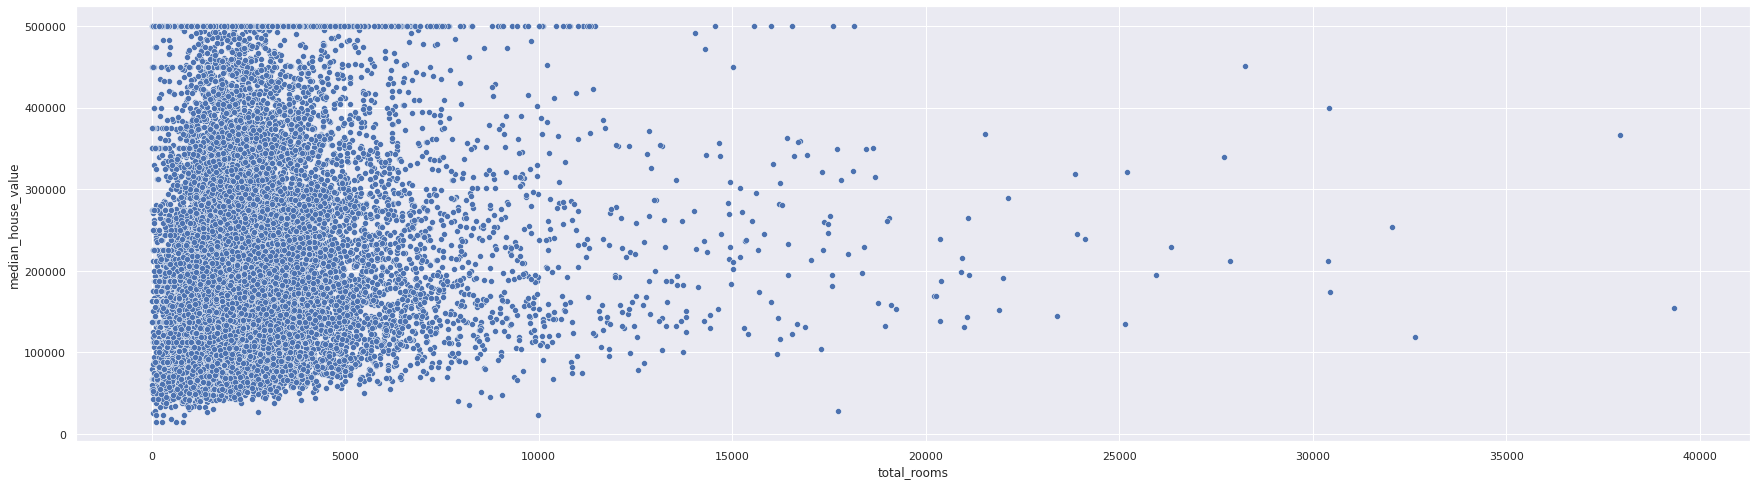

In [84]:
sns.set(rc = {'figure.figsize':(30,8)})
sns.scatterplot(x="total_rooms", y ="median_house_value", data = housing)

In [85]:
housing["total_rooms"].describe()

count    20639.000000
mean      2635.740394
std       2181.665670
min          2.000000
25%       1447.500000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

In [86]:
q1 = 1447.500000
q3 = 3148.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [87]:
#Handling the outliers in this column
housing = housing.loc[(housing["total_rooms"]<u)]
housing = housing.loc[(housing["total_rooms"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
5        -122.25     37.85           28.676283          919           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
5      1424.928724       193.0         4.0368              269700   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3       1  
2                    3       1  
3                    3       0  
4                    3       1  
5                    3       0  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[19352 rows x 11 columns]

<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

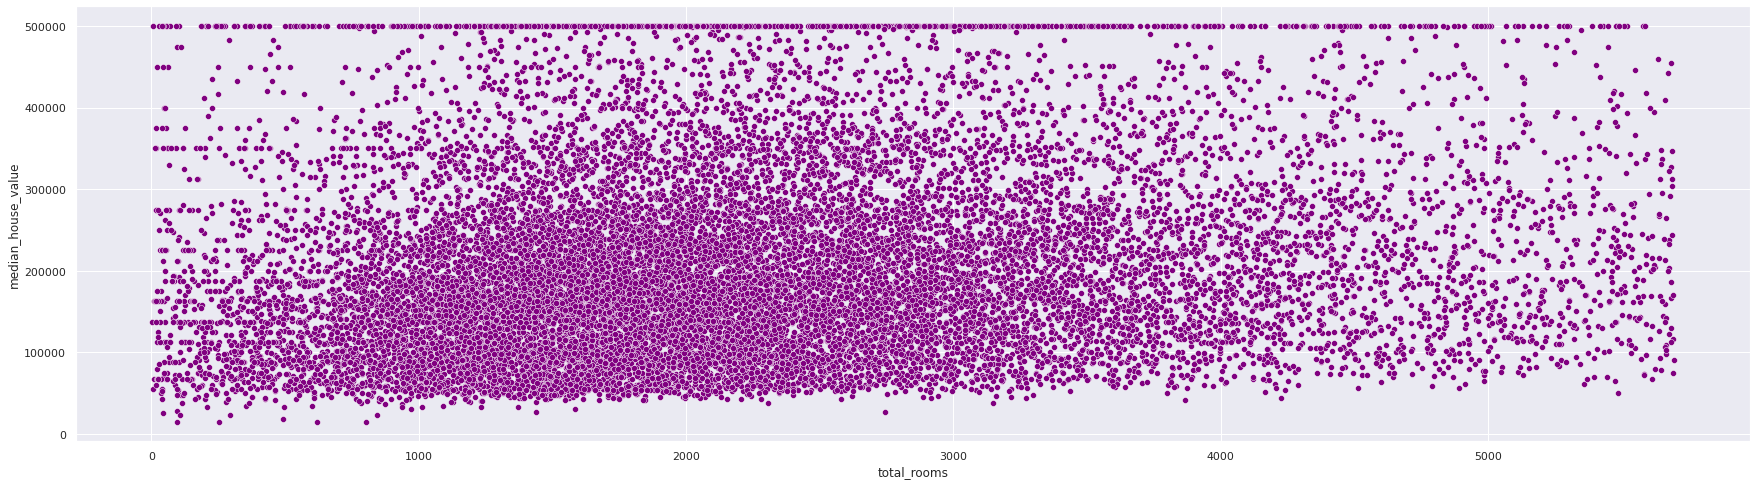

In [88]:
#scatter plot after handling the outliers
sns.scatterplot(x="total_rooms", y ="median_house_value", data = housing, color = "Purple")

- Now, the column has no outliers.

####  
#### 6.3 total_bedrooms column

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

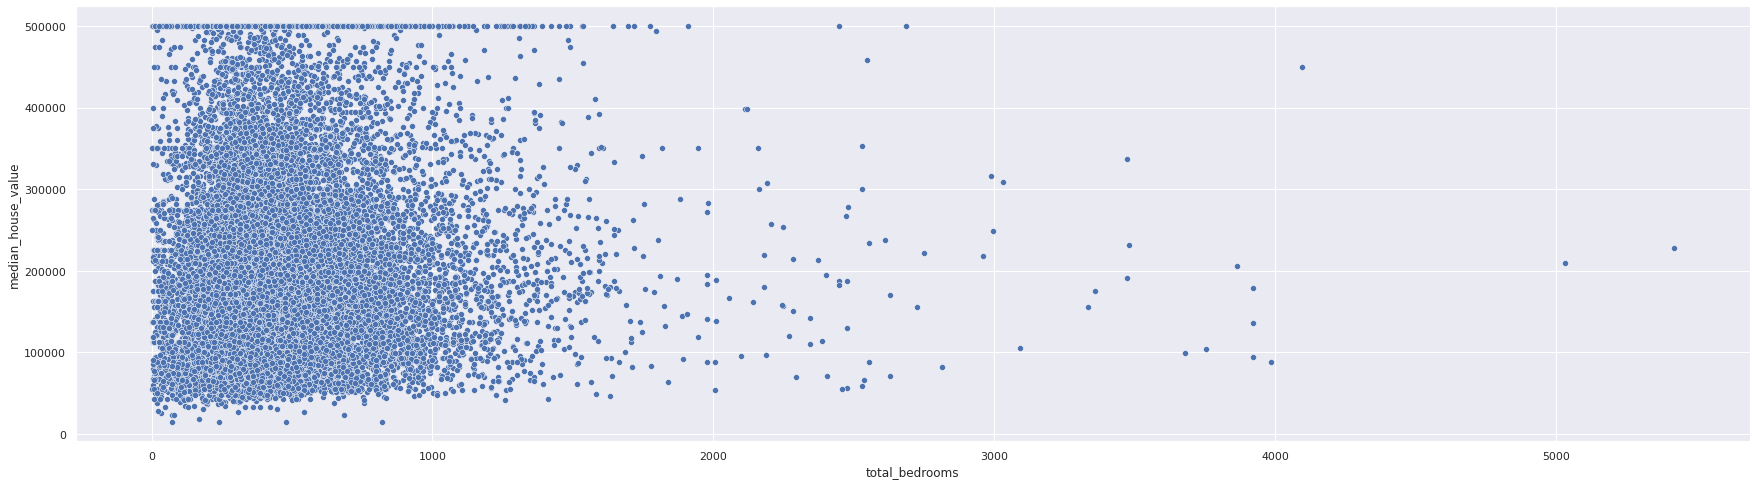

In [89]:
sns.scatterplot(x="total_bedrooms", y ="median_house_value", data = housing)

In [90]:
housing["total_bedrooms"].describe()

count    19352.000000
mean       484.794130
std        309.123932
min          1.000000
25%        290.000000
50%        421.000000
75%        610.250000
max       5419.000000
Name: total_bedrooms, dtype: float64

In [91]:
q1 = 290.000000
q3 = 610.250000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [92]:
#Handling the outliers in this column
housing = housing.loc[(housing["total_bedrooms"]<u)]
housing = housing.loc[(housing["total_bedrooms"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
5        -122.25     37.85           28.676283          919           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
5      1424.928724       193.0         4.0368              269700   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3       1  
2                    3       1  
3                    3       0  
4                    3       1  
5                    3       0  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[18600 rows x 11 columns]

<AxesSubplot:xlabel='total_bedrooms', ylabel='median_house_value'>

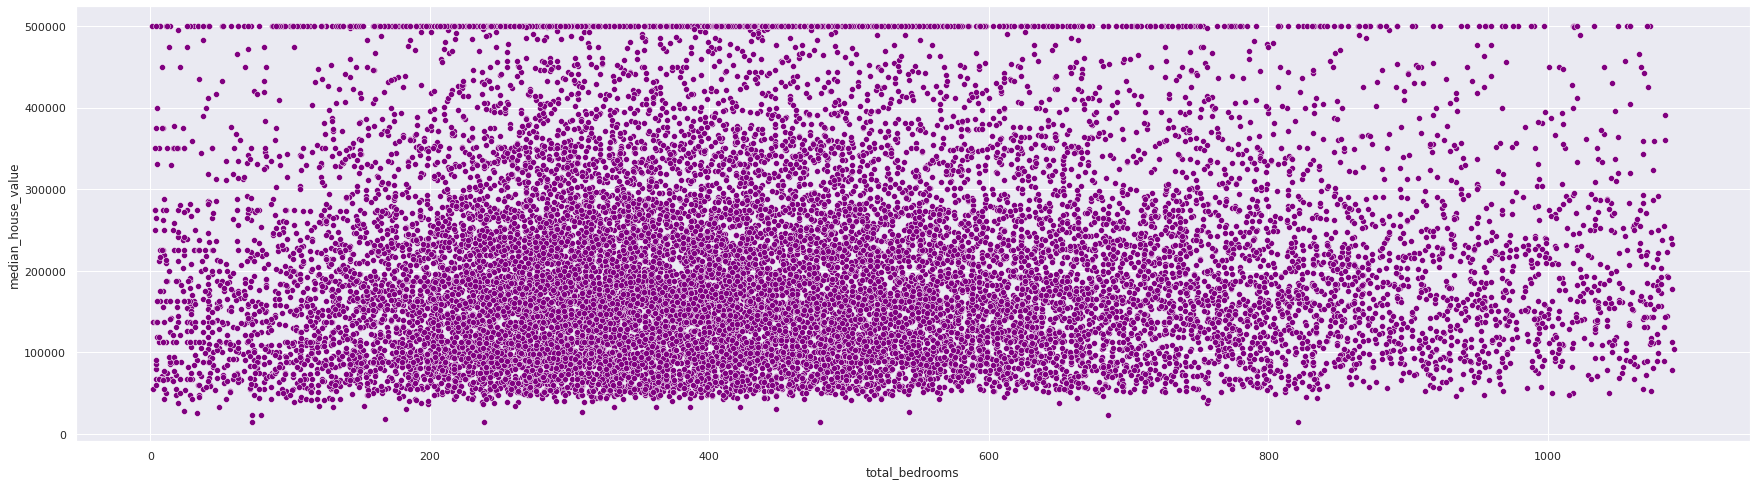

In [93]:
#scatter plot after handling the outliers
sns.scatterplot(x="total_bedrooms", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

####  
#### 6.4 population column

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

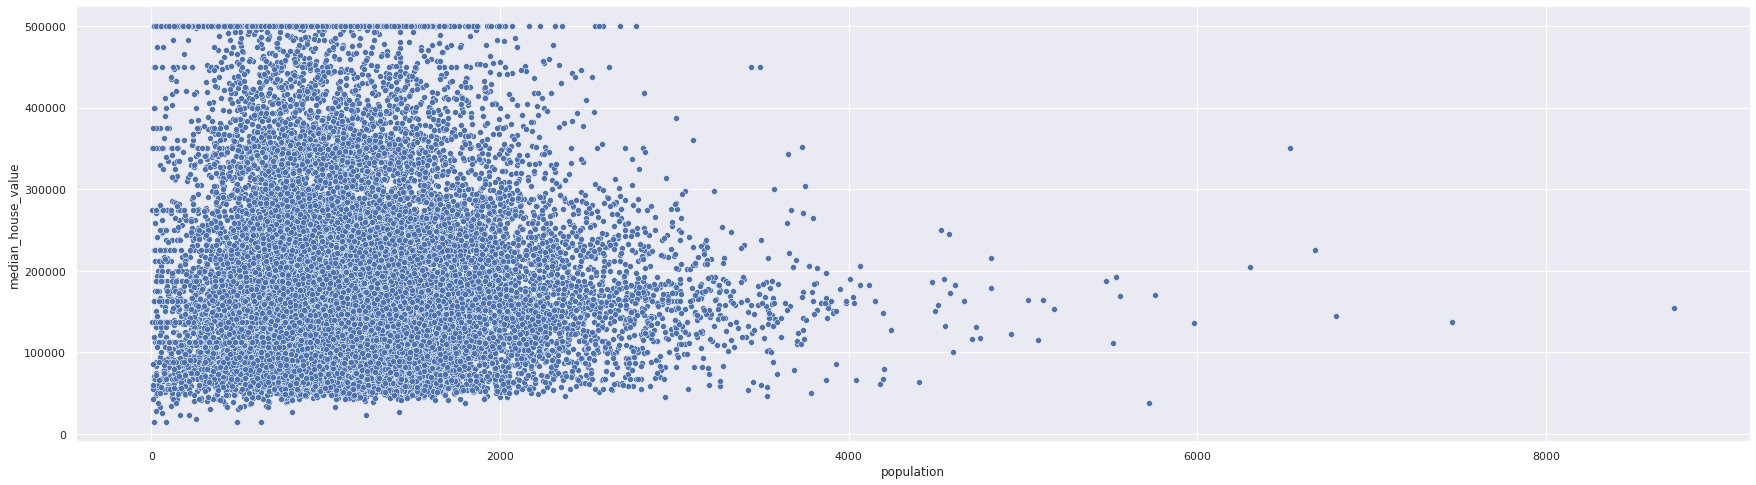

In [94]:
sns.scatterplot(x="population", y ="median_house_value", data = housing)

In [95]:
housing["population"].describe()

count    18600.000000
mean      1212.905668
std        665.375933
min          3.000000
25%        759.000000
50%       1104.000000
75%       1556.000000
max       8733.000000
Name: population, dtype: float64

In [96]:
q1 = 759.000000
q3 = 1556.000000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [97]:
#Handling the outliers in this column
housing = housing.loc[(housing["population"]<u)]
housing = housing.loc[(housing["population"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
5        -122.25     37.85           28.676283          919           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
5      1424.928724       193.0         4.0368              269700   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3       1  
2                    3       1  
3                    3       0  
4                    3       1  
5                    3       0  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[18086 rows x 11 columns]

<AxesSubplot:xlabel='population', ylabel='median_house_value'>

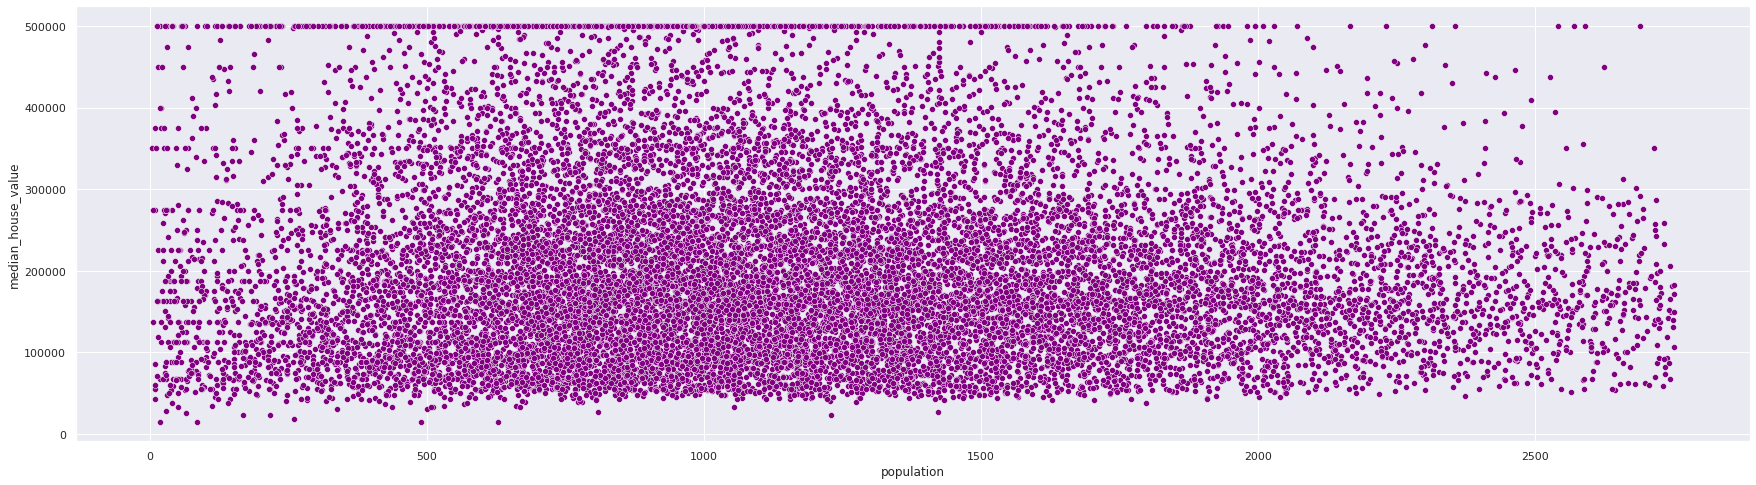

In [98]:
#scatter plot after handling the outliers
sns.scatterplot(x="population", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

####  
#### 6.5 households column

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

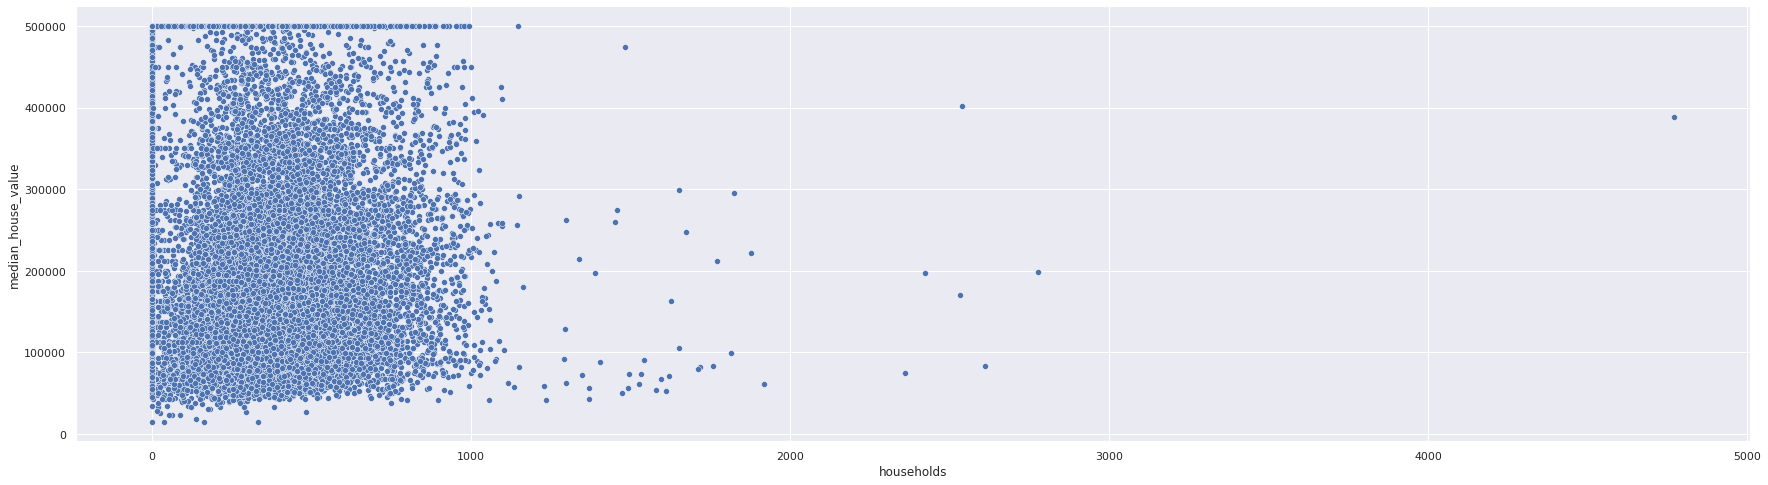

In [99]:
sns.scatterplot(x="households", y ="median_house_value", data = housing)

In [100]:
housing["households"].describe()

count    18086.000000
mean       350.628718
std        246.045306
min          0.000000
25%        191.000000
50%        340.000000
75%        498.750000
max       4769.000000
Name: households, dtype: float64

In [101]:
q1 = 191.000000
q3 = 498.750000
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [102]:
#Handling the outliers
housing = housing.loc[(housing["households"]<u)]
housing = housing.loc[(housing["households"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88           41.000000          880           129.0   
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
5        -122.25     37.85           28.676283          919           213.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
0       322.000000       126.0         8.3252              452600   
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
5      1424.928724       193.0         4.0368              269700   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
0                    3       1  
2                    3       1  
3                    3       0  
4                    3       1  
5                    3       0  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[17914 rows x 11 columns]

<AxesSubplot:xlabel='households', ylabel='median_house_value'>

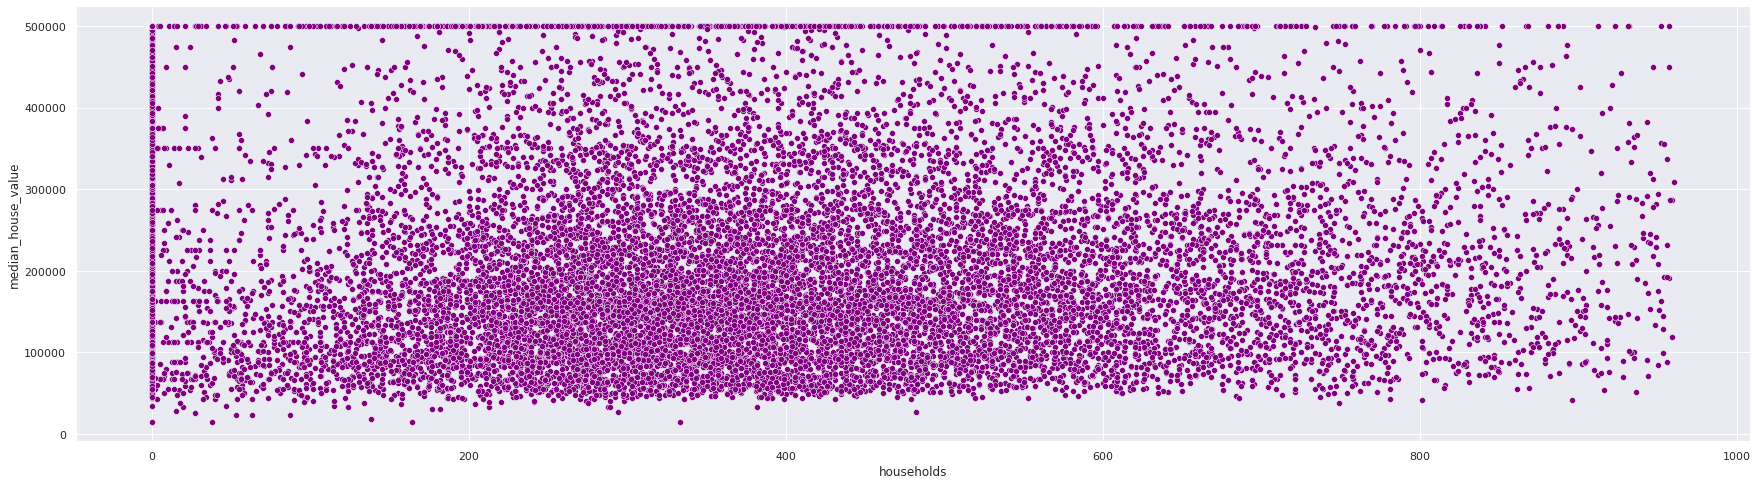

In [103]:
#scatter plot after handling the outliers
sns.scatterplot(x="households", y ="median_house_value", data = housing, color = "Purple")

- Now, the column has no outliers.

####  
#### 6.6 median_income column

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

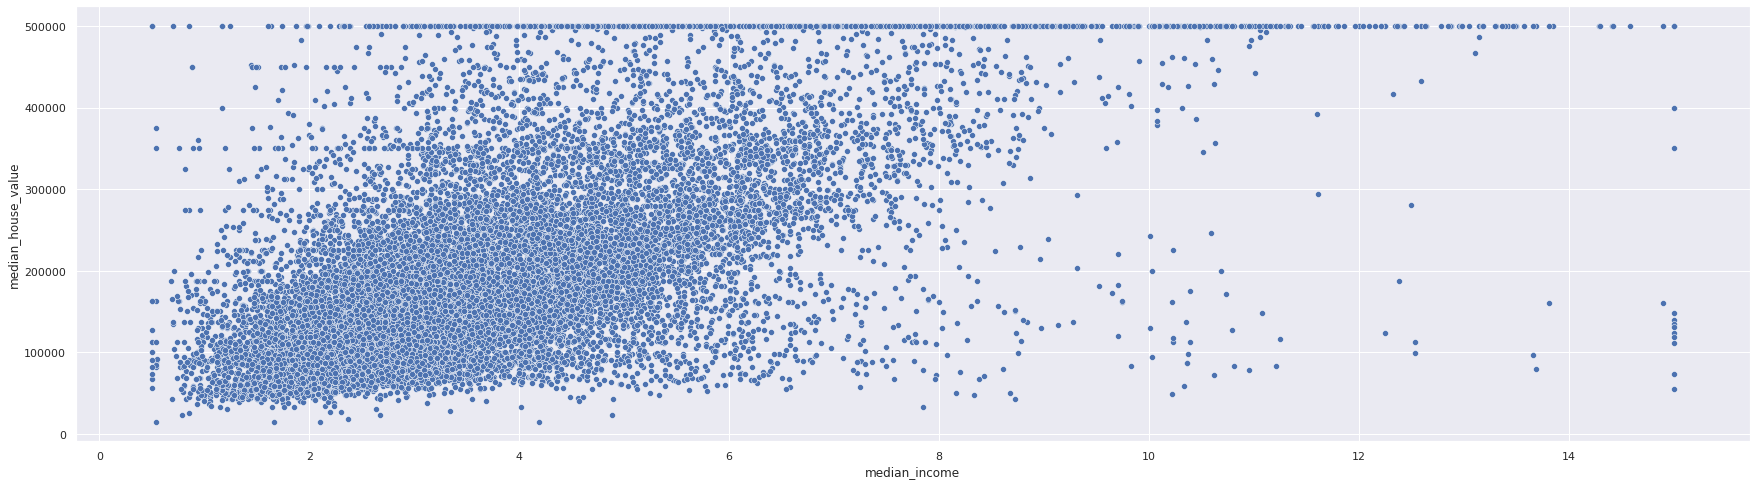

In [104]:
sns.scatterplot(x='median_income', y="median_house_value", data = housing)

In [105]:
housing["median_income"].describe()

count    17914.000000
mean         3.932400
std          1.953495
min          0.499900
25%          2.593800
50%          3.583300
75%          4.822900
max         15.000100
Name: median_income, dtype: float64

In [106]:
q1 = 2.593800
q3 = 4.822900
iqr = q3-q1
l = q1 -1.5*iqr
u = q3+1.5*iqr

In [107]:
#Handling the outliers in this column
housing = housing.loc[(housing["median_income"]<u)]
housing = housing.loc[(housing["median_income"]>l)] 
housing

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
2        -122.24     37.85           52.000000         1467           190.0   
3        -122.25     37.85           52.000000         1274           235.0   
4        -122.25     37.85           28.676283         1627           280.0   
5        -122.25     37.85           28.676283          919           213.0   
6        -122.25     37.84           28.676283         2535           416.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48           25.000000         1665           374.0   
20636    -121.21     39.49           18.000000          697           150.0   
20637    -121.22     39.43           17.000000         2254           485.0   
20638    -121.32     39.43           18.000000         1860           409.0   
20639    -121.24     39.37           16.000000         2785           616.0   

        population  households  median_income  median_house_value  \
2       496.000000       177.0         7.2574              352100   
3       558.000000       219.0         5.6431              341300   
4      1424.928724       259.0         3.8462              342200   
5      1424.928724       193.0         4.0368              269700   
6      1424.928724       514.0         3.6591              299200   
...            ...         ...            ...                 ...   
20635   845.000000       330.0         1.5603               78100   
20636   356.000000       114.0         2.5568               77100   
20637  1007.000000       433.0         1.7000               92300   
20638   741.000000       349.0         1.8672               84700   
20639  1387.000000       530.0         2.3886               89400   

       ocean_proximity  gender  
2                    3       1  
3                    3       0  
4                    3       1  
5                    3       0  
6                    3       1  
...                ...     ...  
20635                1       0  
20636                1       1  
20637                1       0  
20638                1       1  
20639                1       0  

[17331 rows x 11 columns]

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

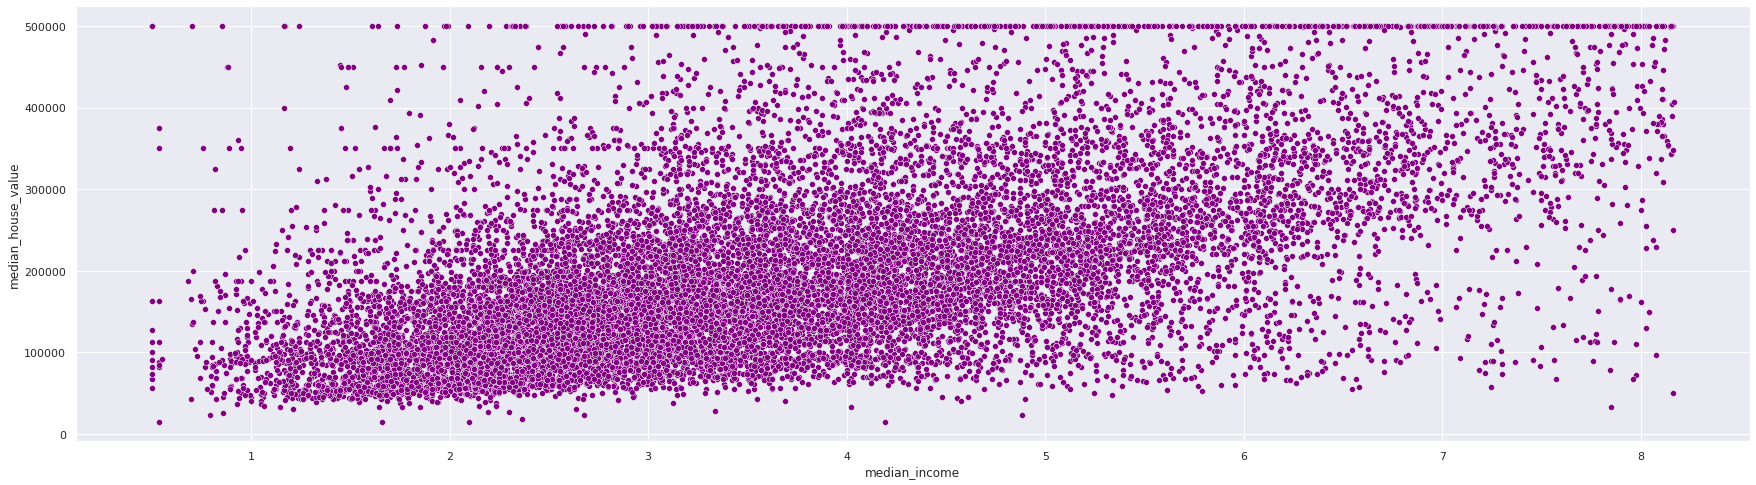

In [108]:
#scatter plot after handling the outliers
sns.scatterplot(x="median_income", y ="median_house_value", data = housing, color = "Purple" )

- Now, the column has no outliers.

###   
### 7. Train test split

In [109]:
housing1 = housing.iloc[:,2:-2]
housing1

housing_median_age  total_rooms  total_bedrooms   population  \
2               52.000000         1467           190.0   496.000000   
3               52.000000         1274           235.0   558.000000   
4               28.676283         1627           280.0  1424.928724   
5               28.676283          919           213.0  1424.928724   
6               28.676283         2535           416.0  1424.928724   
...                   ...          ...             ...          ...   
20635           25.000000         1665           374.0   845.000000   
20636           18.000000          697           150.0   356.000000   
20637           17.000000         2254           485.0  1007.000000   
20638           18.000000         1860           409.0   741.000000   
20639           16.000000         2785           616.0  1387.000000   

       households  median_income  median_house_value  
2           177.0         7.2574              352100  
3           219.0         5.6431              341300  
4           259.0         3.8462              342200  
5           193.0         4.0368              269700  
6           514.0         3.6591              299200  
...           ...            ...                 ...  
20635       330.0         1.5603               78100  
20636       114.0         2.5568               77100  
20637       433.0         1.7000               92300  
20638       349.0         1.8672               84700  
20639       530.0         2.3886               89400  

[17331 rows x 7 columns]

In [110]:
x = housing1.drop("median_house_value", axis = 1).values
x

array([[5.20000000e+01, 1.46700000e+03, 1.90000000e+02, 4.96000000e+02,
        1.77000000e+02, 7.25740000e+00],
       [5.20000000e+01, 1.27400000e+03, 2.35000000e+02, 5.58000000e+02,
        2.19000000e+02, 5.64310000e+00],
       [2.86762830e+01, 1.62700000e+03, 2.80000000e+02, 1.42492872e+03,
        2.59000000e+02, 3.84620000e+00],
       ...,
       [1.70000000e+01, 2.25400000e+03, 4.85000000e+02, 1.00700000e+03,
        4.33000000e+02, 1.70000000e+00],
       [1.80000000e+01, 1.86000000e+03, 4.09000000e+02, 7.41000000e+02,
        3.49000000e+02, 1.86720000e+00],
       [1.60000000e+01, 2.78500000e+03, 6.16000000e+02, 1.38700000e+03,
        5.30000000e+02, 2.38860000e+00]])

In [111]:
y = housing1["median_house_value"].values
y

array([352100, 341300, 342200, ...,  92300,  84700,  89400])

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 40)

In [113]:
x_train

array([[4.3000e+01, 1.9490e+03, 4.6400e+02, 1.2160e+03, 4.5700e+02,
        3.3214e+00],
       [3.6000e+01, 1.7410e+03, 4.1200e+02, 1.2450e+03, 4.2300e+02,
        4.1344e+00],
       [1.6000e+01, 7.4900e+02, 2.8600e+02, 1.2770e+03, 0.0000e+00,
        1.2054e+00],
       ...,
       [3.0000e+01, 2.3650e+03, 4.1700e+02, 1.0530e+03, 4.0900e+02,
        5.5959e+00],
       [1.5000e+01, 9.7800e+02, 1.8700e+02, 4.0700e+02, 1.8200e+02,
        4.3750e+00],
       [9.0000e+00, 3.2930e+03, 5.8500e+02, 1.6780e+03, 5.3000e+02,
        3.0583e+00]])

In [114]:
x_test

array([[2.8000e+01, 1.7650e+03, 5.1500e+02, 8.3200e+02, 0.0000e+00,
        6.5928e+00],
       [3.7000e+01, 3.7500e+02, 5.8000e+01, 1.2000e+02, 3.7000e+01,
        3.9844e+00],
       [1.6000e+01, 1.3260e+03, 2.8600e+02, 5.0900e+02, 2.9700e+02,
        1.9464e+00],
       ...,
       [1.1000e+01, 2.8800e+03, 8.2400e+02, 1.8060e+03, 0.0000e+00,
        3.8056e+00],
       [4.8000e+01, 1.1120e+03, 2.2700e+02, 5.8300e+02, 2.1600e+02,
        2.3393e+00],
       [1.7000e+01, 2.6160e+03, 4.9200e+02, 1.1580e+03, 4.5700e+02,
        2.8807e+00]])

In [115]:
y_train

array([209300, 210300,  60900, ..., 346200, 158000,  98300])

In [116]:
y_test

array([439100, 150000, 112500, ..., 171100,  77600, 142600])

####   
### 8. Scaling the data using Robust Scaler

In [117]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

###   
### 9. Building Linear Regression models

In [118]:
reg = linear_model.LinearRegression()
#the training process
reg.fit(x_train, y_train)

LinearRegression()

In [119]:
#the accuracy of the training process
reg.score(x_train, y_train)

0.3947002884613895

In [120]:
#the accuracy of the testing process
reg.score(x_test, y_test)

0.3755548366778644

In [121]:
reg.intercept_

190475.71561072508

In [122]:
reg.coef_

array([ 35052.19425841,  27652.02427087,  13042.0692896 , -35760.02985525,
         7928.61974097,  81388.55246552])

In [123]:
pd.DataFrame(reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age  35052.194258
total_rooms         27652.024271
total_bedrooms      13042.069290
population         -35760.029855
households           7928.619741
median_income       81388.552466

In [124]:
y_pred = reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred})
df_out.head()

y_test         y_pred
0  439100  306688.362564
1  150000  209206.898800
2  112500  108385.329396
3  165900  191320.459038
4   69500  270941.215173

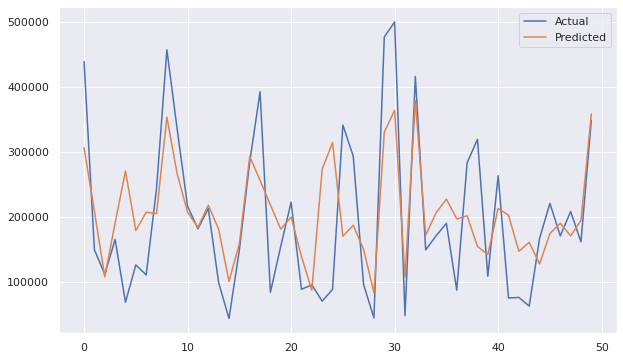

In [125]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

###   
### 10. Ridge Regression

In [126]:
reg = linear_model.Ridge(alpha = 0.4)
#the training process
reg.fit(x_train, y_train)

Ridge(alpha=0.4)

In [127]:
#the accuracy of the training process
reg.score(x_train, y_train)

0.3947002865904592

In [128]:
#the accuracy of the testing process
reg.score(x_test, y_test)

0.3755562030527575

In [129]:
reg.intercept_

190476.1016400699

In [130]:
reg.coef_

array([ 35049.15179914,  27647.74807456,  13040.56658718, -35753.83823306,
         7927.8256907 ,  81384.95080803])

In [131]:
pd.DataFrame(reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age  35049.151799
total_rooms         27647.748075
total_bedrooms      13040.566587
population         -35753.838233
households           7927.825691
median_income       81384.950808

In [132]:
y_pred = reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred})
df_out.head()

y_test         y_pred
0  439100  306682.870969
1  150000  209205.137613
2  112500  108388.883190
3  165900  191320.849424
4   69500  270942.817362

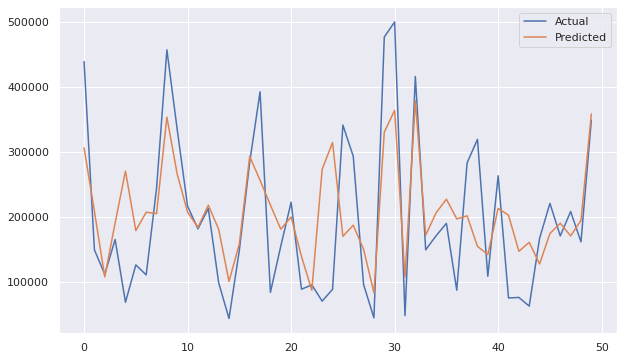

In [133]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

###   
### 11. Lasso Regression

In [134]:
reg = linear_model.Lasso(alpha = 0.9)
#the training process
reg.fit(x_train, y_train)

Lasso(alpha=0.9)

In [135]:
#the accuracy of the training process
reg.score(x_train, y_train)

0.3947002869179165

In [136]:
#the accuracy of the testing process
reg.score(x_test, y_test)

0.3755552528207272

In [137]:
reg.intercept_

190475.87609303195

In [138]:
reg.coef_

array([ 35049.59609059,  27646.42831993,  13040.17722007, -35752.16385439,
         7926.81519045,  81388.06701325])

In [139]:
pd.DataFrame(reg.coef_, housing1.columns[:-1], columns = ["coefficient"])

coefficient
housing_median_age  35049.596091
total_rooms         27646.428320
total_bedrooms      13040.177220
population         -35752.163854
households           7926.815190
median_income       81388.067013

In [140]:
y_pred = reg.predict(x_test)
df_out = pd.DataFrame({"y_test":y_test, "y_pred": y_pred})
df_out.head()

y_test         y_pred
0  439100  306687.746785
1  150000  209206.643844
2  112500  108385.578741
3  165900  191320.214635
4   69500  270947.084157

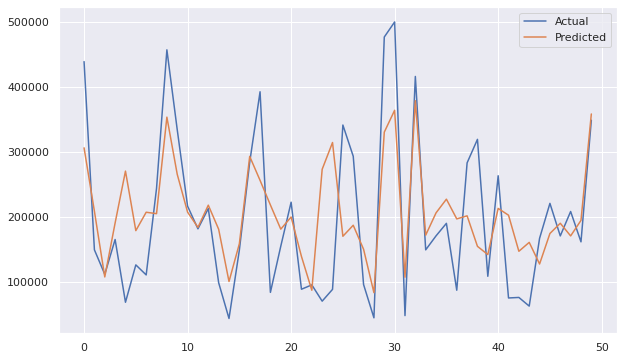

In [141]:
plt.figure(figsize=(10,6))
plt.plot(df_out[:50])
plt.legend(["Actual", "Predicted"])

###   
### The dataset is non-linear, so for sure the regression models will give us low accuracy.